In [1]:
from pathlib import Path
from gradientlab.experiments.exp20251227_imagetextzip.modeling.factory import GPTFactory
from gradientlab.data_utils.experiment_path import get_ckpt_path_by_exp_name
import random
from gradientlab.experiments.exp20251227_imagetextzip.torch_dataset import Collate, MyDataset
from datasets import load_from_disk, DatasetDict

exp_name = Path(".").resolve().absolute().name
ckpt_path = get_ckpt_path_by_exp_name(exp_name)
exp_name

/media/mascit/data/Projects/python/gradientlab/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'exp20251227_imagetextzip'

In [5]:
from gradientlab.experiments.exp20251227_imagetextzip.exp_config import ds_name
import matplotlib.pyplot as plt

model, tokenizer, cfg = GPTFactory.build_8m(ckpt_path.as_posix())

device = "cpu"

collate_fn = Collate(tokenizer)
ds_dict = load_from_disk(ds_name)
assert isinstance(ds_dict, DatasetDict)
split_name = "train"

torch_ds = MyDataset(ds_dict[split_name])

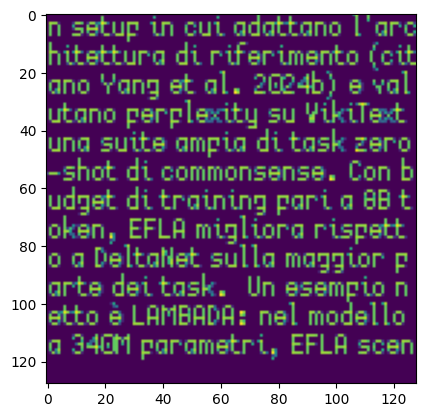

In [6]:
i = random.randrange(0, len(torch_ds))
sample = torch_ds[i]
lbl = sample["text"]

plt.imshow(sample["pixel_values"].squeeze(0))

In [7]:
inputs = collate_fn(
    [{"pixel_values": sample["pixel_values"], "text": "<|im_start|>"}]
)
inputs = {k: v.to(device) for k, v in inputs.items()}

tokens = model.generate(
    images=inputs["pixel_values"],
    bos_token_id=tokenizer.convert_tokens_to_ids("<|im_start|>"),  # type: ignore
    eos_token_id=tokenizer.convert_tokens_to_ids("<|im_end|>"),  # type: ignore
    max_new_tokens=1024
)

tokenizer.decode(tokens[0])

"<|im_start|> n setup in cui adattano l'architettura di riferimento (citano Yang et al. 2024b) e valutano perplexity su WikiText euna suite ampia di task zero-shot di commonsense. Con budget di training pari a 8B token, EFLA migliora rispetto a DeltaNet sulla maggior parte dei task.  Un esempio netto è LAMBADA: nel modello da 340M parametri, EFLA scen <|im_end|>"